In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import random
import os
from pathlib import Path
import string
import matplotlib.image as mpimg
import seaborn as sns

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
image_directory = r'C:\Users\tblon\Downloads\asl\asl_alphabet_train\asl_alphabet_train'

alphabet = list(string.ascii_uppercase)
alphabet.append('space')

directories = {}

for char in alphabet:
    path = os.path.join(image_directory,char)
    directories.setdefault(char,path)

### The dataset includes 27 sign language characters (26 letters and space) with 3,000 images of each letter, totalling 81,000 images. Here are examples of what characters can look like.

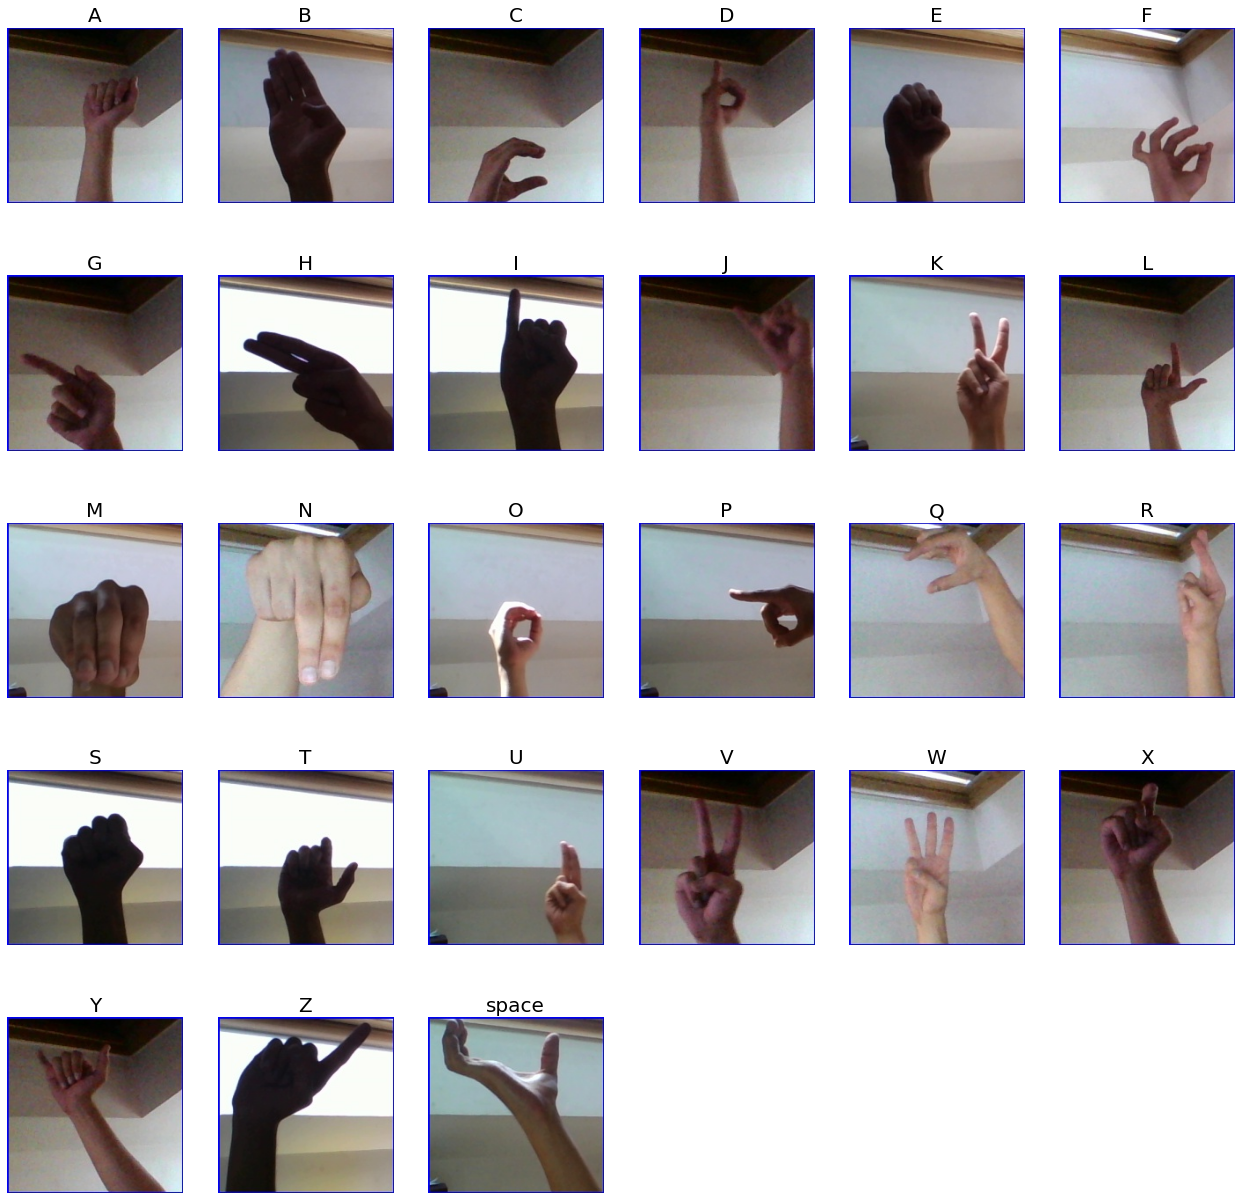

In [3]:
fig = plt.figure(figsize = (22,22))

for char in range(len(alphabet)):
    
    num = random.randint(0,3000)
    
    letter = alphabet[char]
    img_path = image_directory + f'\\{letter}\\{letter}{num}.jpg'
    img = mpimg.imread(img_path)
    
    fig.add_subplot(5,6,char+1)
    plt.imshow(img)
    plt.title(letter,fontdict = {'fontsize':20})
    plt.axis('off')
    
plt.show()

In [4]:
data_generator = ImageDataGenerator(rescale = 1/255,
                                   rotation_range = 20,
                                   horizontal_flip = False,
                                   width_shift_range = .15,
                                   height_shift_range = .15,
                                    fill_mode = 'nearest',
                                   shear_range = .2,
                                   validation_split = .03)

batches = 20

train_data = data_generator.flow_from_directory(image_directory,
                                               target_size = (150,150),
                                               class_mode = 'categorical',
                                               batch_size = batches,
                                                subset = 'training'
                                               )

validation_data = data_generator.flow_from_directory(image_directory,
                                                    target_size = (150,150),
                                                    class_mode = 'categorical',
                                                    batch_size = batches,
                                                     subset = 'validation'
                                                    )

Found 78570 images belonging to 27 classes.
Found 2430 images belonging to 27 classes.


In [5]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epochs,logs={}):
        if(logs.get('val_accuracy')>.95):
            print("Cancelling training at >95% accuracy")
            self.model.stop_training = True
            
callback = myCallback()

In [6]:
model = keras.Sequential([
    keras.layers.Conv2D(12, (3,3), activation = 'relu', input_shape = (150,150,3), padding = 'same'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(24, (3,3), activation = 'relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout(.1),
    keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout(.2),
    keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    keras.layers.Dropout(.2),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(520, activation = 'relu'),
    keras.layers.Dropout(.3),
    keras.layers.Dense(50, activation = 'tanh'),
    keras.layers.Dense(27, activation = 'softmax')
])

model.compile(optimizer = 'adam',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 12)      336       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 12)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 73, 73, 24)        2616      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 24)        0         
_________________________________________________________________
dropout (Dropout)            (None, 36, 36, 24)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        13888     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0

In [7]:
epochs = 16

history = model.fit(train_data,
                   validation_data = validation_data,
                   epochs = epochs,
                   callbacks = [callback])

Epoch 1/16
3929/3929 [==============================] - 1876s 477ms/step - loss: 2.1367 - accuracy: 0.3479 - val_loss: 0.5887 - val_accuracy: 0.7909
Epoch 2/16
3929/3929 [==============================] - 1996s 508ms/step - loss: 0.6148 - accuracy: 0.7927 - val_loss: 0.3557 - val_accuracy: 0.8757
Epoch 3/16
3929/3929 [==============================] - 1393s 354ms/step - loss: 0.3933 - accuracy: 0.8658 - val_loss: 0.3809 - val_accuracy: 0.8683
Epoch 4/16
3929/3929 [==============================] - 1355s 345ms/step - loss: 0.3238 - accuracy: 0.8896 - val_loss: 0.3013 - val_accuracy: 0.9086
Epoch 5/16
3929/3929 [==============================] - 1343s 342ms/step - loss: 0.2772 - accuracy: 0.9073 - val_loss: 0.1966 - val_accuracy: 0.9296
Epoch 6/16
3929/3929 [==============================] - 1566s 398ms/step - loss: 0.2490 - accuracy: 0.9160 - val_loss: 0.2563 - val_accuracy: 0.9140
Epoch 7/16
3929/3929 [==============================] - 1059s 270ms/step - loss: 0.2404 - accuracy: 0.9207

In [10]:
loss = history.history['loss']
accuracy = history.history['accuracy']

validation_loss = history.history['val_loss']
validation_accuracy = history.history['val_accuracy']

epoch = np.arange(1,len(loss)+1)

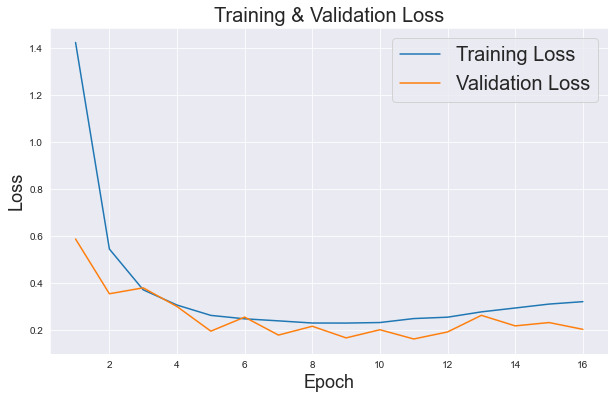

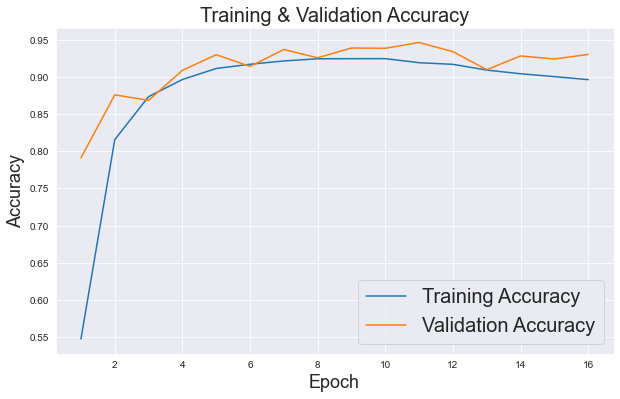

In [12]:
plt.figure(figsize=(10,6))
plt.plot(epoch,loss)
plt.plot(epoch,validation_loss)
plt.title('Training & Validation Loss',fontdict={'fontsize':20})
plt.xlabel('Epoch',fontdict={'fontsize':18})
plt.ylabel('Loss',fontdict={'fontsize':18})
plt.legend(['Training Loss','Validation Loss'],prop={'size':20})
sns.set_style('darkgrid')
plt.show()

plt.figure(figsize=(10,6))
plt.plot(epoch,accuracy)
plt.plot(epoch,validation_accuracy)
plt.title('Training & Validation Accuracy',fontdict={'fontsize':20})
plt.xlabel('Epoch',fontdict={'fontsize':18})
plt.ylabel('Accuracy',fontdict={'fontsize':18})
plt.legend(['Training Accuracy','Validation Accuracy'],prop={'size':20})
sns.set_style('darkgrid')
plt.show()

In [13]:
def predict_letter(image):
    
    reshaped_image = image.reshape((1,) + image.shape)
    class_probabilities = model.predict(reshaped_image)
    letter = alphabet[class_probabilities.argmax()]
    
    return letter

validation_images = []
validation_labels = []
predicted_labels = []

for tup in validation_data:  
    pics = len(tup[0])       
    for pic in range(pics):
        img = tup[0][pic]
        actual_label = alphabet[tup[1][pic].argmax()]
        predicted_label = predict_letter(img)
        
        validation_images.append(img)
        validation_labels.append(actual_label)
        predicted_labels.append(predicted_label) 
        
    if len(validation_images) >= 2700:
        break

In [14]:
predicted_letters = {}

for i in range(len(validation_images)):
    
    letter = predicted_labels[i]
    
    if letter not in predicted_letters.keys():
        predicted_letters.setdefault(letter,[[validation_images[i]],[validation_labels[i]]])
        
    elif letter in predicted_letters.keys():
        predicted_letters[letter][0].append(validation_images[i])
        predicted_letters[letter][1].append(validation_labels[i])

## Here, I use images from the validation set to write a sentence based on the model's predictions. The large letters above the images are the actual labels, with the predicted labels underneath.

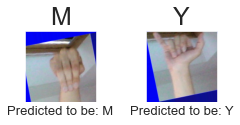

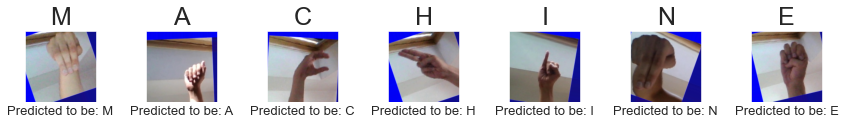

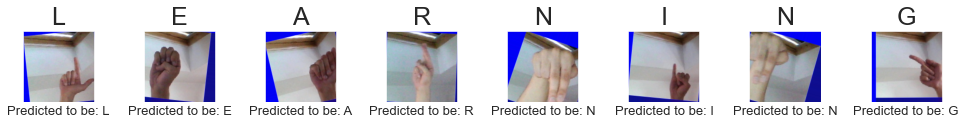

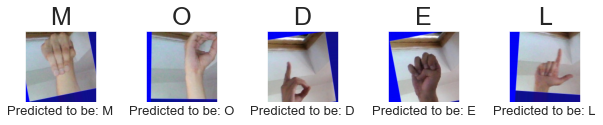

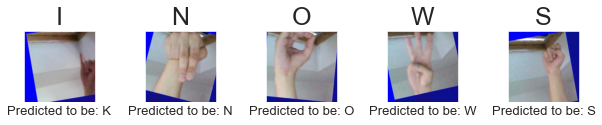

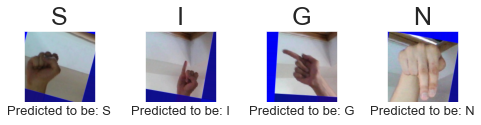

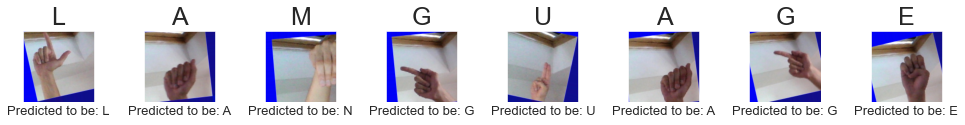

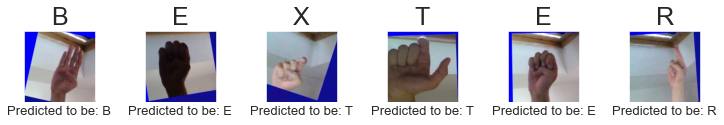

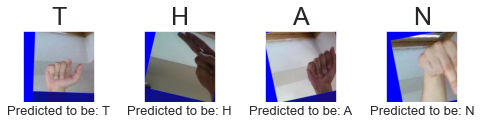

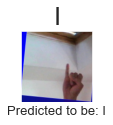

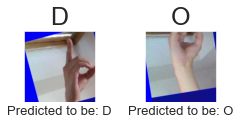

In [23]:
sentence = "My machine learning model knows sign language better than I do"
words = sentence.split()
longest_word_size = max([len(word) for word in words])

for word in words:
    fig = plt.figure(figsize=(17,17))
    word_length = len(word)
    for char in range(word_length):
        letter = word[char].upper()
        rand_num = random.randint(0,len(predicted_letters[letter][0])-1)
        img = predicted_letters[letter][0][rand_num]
        true_label = predicted_letters[letter][1][rand_num]
        
        fig.add_subplot(len(words),longest_word_size,char+1)
        plt.imshow(img)
        plt.title(true_label,fontdict={'fontsize':25})
        plt.xlabel('Predicted to be: '+str(letter),fontdict={'fontsize':13})
        plt.xticks(())
        plt.yticks(())
    plt.show()